## sklearn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2) #degree:为原来的特征最多添加几次幂这样的特征
poly.fit(X)
X2 = poly.transform(X)

In [6]:
X2.shape

(100, 3)

In [7]:
X2[:5, :] #系数依次是 x^0，x^1, x^2

array([[ 1.        ,  1.52235378,  2.31756102],
       [ 1.        , -2.1567448 ,  4.65154814],
       [ 1.        ,  2.84922915,  8.11810672],
       [ 1.        , -0.46214135,  0.21357462],
       [ 1.        ,  0.77037217,  0.59347328]])

In [8]:
X[:5, :]

array([[ 1.52235378],
       [-2.1567448 ],
       [ 2.84922915],
       [-0.46214135],
       [ 0.77037217]])

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

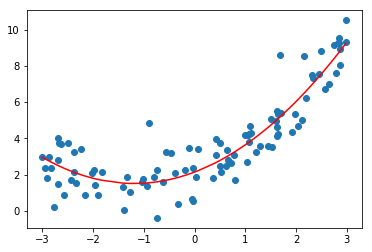

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")

In [11]:
lin_reg2.coef_

array([0.        , 1.05929949, 0.44317152])

In [12]:
lin_reg2.intercept_

2.138377085923853

## 关于PolynomialFeatures

假设原有X中有两个特征

In [13]:
X = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2.shape # X2从原来的5行2列变变为了5行6列

(5, 6)

In [17]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

解释X2
- 第一列：$x^0$ 的系数
- 第二列：$x^1$ 的系数，也是原来X矩阵的第一列
- 第三列：$x^2$ 的系数，也是原来X矩阵的第二列
- 第三列：原来X矩阵第一列平方之后的结果
- 第四列：原来X矩阵第一列乘以第二列的结果
- 第五列：原来X矩阵第二列平方之后的结果

In [18]:
# 验证当 degree=3
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3.shape

(5, 10)

## Pipeline

管道

In [19]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
]) # 传入列表，就是管道相应的米每一个步骤对应的类

In [22]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

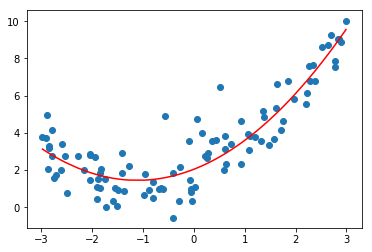

In [23]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")